* !This notebook is NOT a clean code. 
* Its purpose is only to quick and dirty illustratesome successful tests i've made to plot DREAM outputs in northpole stereographic projection and to add marks around to show the location of the source.
* Up to you to use whatever you need from it depending on what you want for the final figures, and adapt your own plotting code.
* NOTE: one caveat from the northpolestereo projection: you don't seem to be allowed to have longitude thick labels automaically.

## Imports

In [1]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr
    
# plot
import cartopy.crs as ccrs
import cartopy.feature as ccf
import cartopy.util as ccu
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# My custom module with plot tools
#import utils_SLX_plots_dream as slx


# Only if using jupyter notebook. Otherwise, comment out.
%matplotlib inline 

## Definition of some plot functions

In [2]:
def testplotmap(fig1,ehonan,nav_lon,nav_lat,plto='tmp_plot',cm_base='viridis',vmin='0',vmax='0',Nincr=10,typlo='contourf',Nbar=10,glo=True,coastL=False,coastC=False,xlim=(0,10), ylim=(0,10),su='b',so='k',loncentr=0.,latcentr=0.,labelplt="",gloproj='Robinson',edgcol1='#585858',edgcol2='w',subplt=[1,1,1],scattcmap=True):
        '''
        PURPOSE: Plot regional or global map of gridded data (shading).
        Uses Cartopy, xarray, matplotlib, numpy.
        
        ARGUMENTS: 
        * fig1: figure id,
        * ehonan: the 2-d array of geographical data to plot (xarray or np.array of 2 dims) 
        * nav_lon: corresponding longitude  array. Works with longitude given as 1-d vectors (if regular grid such as DREAM model) 
                or 2-d arrays (unregular grid such as the ORCA-NEMO-grid)
        * nav_lat: corresponding lat array
        
        OPTIONS: (Note that you can ommit these options when calling the plot function and in this case the defaut values are applied. Note also that t
        he order in which he options are given does no matter.)
        - cm_base: colormap (defaut=cm.viridis)
        - plto: plo name (defaut='tmpplot')
        - vmin: data min value to plot (color shading) (defaut vmin='0')
        - vmax: data max value to plot (color shading) (defaut vmax='0')
        - Nincr: number of color segments of the colormap (defaut Nincr=10)
        - typlo: type of plot (can be 'contourf', 'pcolormesh' or 'scatter', defaut is contourf, 'scater is not yet fully implemented')
        - Nbar: number of labels on the colorbar (defaut Nbar=10)
        - glo: global=True (default) sets that  map is global (the projection will be Robinson in nthat case). It is PlateCarre if regional map.
        - gloproj: Projection if global plot. Can be 'Robinson' (defaut) or 'Orthographic'.
        - coastL: set to True  to plot continents as lines (defaut is False)
        - coastC: set to True to fill continents with colors
        - xlim: set regional limits in longitude (degrees) if glo==False (default xlim=(0,10))
        - ylim=(0,10): set regional limits in latitude (degrees) if glo==False (default ylim=(0,10))
        - su: set the color of the values under vmin (appears as a triangle at the edge of the colorbar). Defaut is 'b' blue.
        - so: set the color of the values over vmax (appears as a triangle at the edge of the colorbar). Defaut is 'k' black.
        - loncentr: longitude to center the map projectionn (defaut is 0).
        - labelplt: label of the colorbar (defaut is nothing)
        - edgcol1: color of the line around the global proj, defaut is '#585858'
        - edgcol2: color of the frame around the regional map, defaut is 'w'
        - subplt: defaut subplt=[1,1,1] use in case of subploting. See example in my notrebooks.
        - scattcmap: Can be used to switch off the colorbar. Also, in scatterplot mode, if True scatterplot will be plotted with ehonan values and cmap colormap. If False, scatterplot will be plotted wih a uniform color scattco (defaut is True)
    
        '''
        
        ## imports
        import os,sys
        import numpy as np

        # xarray
        import xarray as xr

        # plot
        import cartopy.crs as ccrs
        import cartopy.feature as ccf
        import matplotlib.pyplot as plt
        from matplotlib.colors import Colormap
        import matplotlib.colors as mcolors
        import matplotlib.dates as mdates
        import matplotlib.cm as cm
        import matplotlib.dates as mdates
        import matplotlib.ticker as mticker
        import matplotlib.path as mpath
        
        # Colormap & levels
        cmap = plt.get_cmap(cm_base)
        cmap.set_under(su,1.)
        cmap.set_over(so,1.) 
        
        if ((vmin==0)&(vmax==0)):
            # case if no vmin and vmax values were given in the options
            levels = mticker.MaxNLocator(nbins=Nincr).tick_values(ehonan.min(), ehonan.max())        
        else:
            # case if vmin and vmax values are given in the options
            levels = mticker.MaxNLocator(nbins=Nincr).tick_values(vmin, vmax)
        norm   = mcolors.BoundaryNorm(levels, ncolors=cmap.N,clip=True)
        
        
        
        
        # Projection:
        
        # format of x,y coordinates givenn as argument
        # Note: if data points are given in classical lat lon coordinates this should
        #       be set to ccrs.PlateCarree() whatever the MAP projection is. See Cartopy doc for more details.
        trdata  = ccrs.PlateCarree() 
          
        if glo:
            if gloproj=='Robinson':
                ax = plt.subplot(subplt[0], subplt[1], subplt[2], projection=ccrs.Robinson(central_longitude=loncentr))
            if gloproj=='Orthographic':
                ax = plt.subplot(subplt[0], subplt[1], subplt[2], projection=ccrs.Orthographic(central_longitude=loncentr,central_latitude=latcentr))
            if gloproj=='NorthPolarStereo':
                ax = plt.subplot(subplt[0], subplt[1], subplt[2],projection=ccrs.NorthPolarStereo(central_longitude=150))
                ax.set_extent([-180., 180., 0., 90.], crs=ccrs.PlateCarree())
                
                
            # marker size
            sm=0.1
        else:
            ax = plt.subplot(subplt[0], subplt[1], subplt[2], projection= ccrs.PlateCarree())
            # marker size
            sm=0.5

        if glo:
            if gloproj=='NorthPolarStereo':
                ax.outline_patch.set_edgecolor('585858')
                ax.outline_patch.set_linewidth(1)
            else:
                ax.set_global() 
                ax.outline_patch.set_edgecolor(edgcol1)
            
        else:
            ax.outline_patch.set_edgecolor(edgcol2)
            

        # grid and grid labels on map
        if glo:
            gl = ax.gridlines(linewidth=1, color='#585858', alpha=0.2, linestyle='--') 
            
            if gloproj=='NorthPolarStereo':
                theta = np.linspace(0, 2*np.pi, 100)
                center, radius = [0.5, 0.5], 0.5
                verts = np.vstack([np.sin(theta), np.cos(theta)]).T
                circle = mpath.Path(verts * radius + center)
                ax.set_boundary(circle, transform=ax.transAxes)

            
        else:
            gl = ax.gridlines(draw_labels=True,linewidth=1, color='#585858', alpha=0.2, linestyle='--')
            # grid labels
            label_style = {'size': 12, 'color': 'black', 'weight': 'bold'}
            gl.xlabel_style = label_style
            gl.xlabels_bottom = False
            gl.xlocator = mticker.FixedLocator(np.arange(-180,180,20,dtype=float))
            gl.ylabel_style = label_style
            gl.ylabels_right = False
            gl.ylocator = mticker.FixedLocator(np.arange(-90,90,20,dtype=float))
       
        # Add Coastlines and or plain continents
        if coastC:
            ax.add_feature(ccf.LAND, facecolor='w', edgecolor='none')
        if coastL:
            ax.coastlines(color='#585858')
        
        ### PLOTS:
        
        if typlo=='pcolormesh':
            cs  = plt.pcolormesh(nav_lon, nav_lat, ehonan,cmap=cmap,transform=trdata,norm=norm,vmin=vmin,vmax=vmax)
        
        if typlo=='contourf':
            cs  = plt.contourf(nav_lon, nav_lat, ehonan,transform=trdata,levels=levels,norm=norm,cmap=cmap,extend='both')
              
        if typlo=='scatter':
            print('Sorry, not implemented yet.')
            return

        if glo==False:
            #limits
            plt.xlim(xlim)
            plt.ylim(ylim) 
        
        if scattcmap:
            # plot colorbar
            cb = plt.colorbar(cs, extend='both',  pad=0.04, orientation='horizontal', shrink=0.5)
            cb.ax.tick_params(labelsize=15) 
            cb.set_label(labelplt,size=15)
            ticks = np.linspace(levels.min(),levels.max(),Nbar)
            cb.set_ticks(ticks)
            new_tickslabels = ["%.2f" % i for i in ticks]
            cb.set_ticklabels(new_tickslabels)
            
        return cs,ax,cb
    
    
    
def make_cmap(colors, position=None, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap


def make_SLXcolormap(reverse=False,whichco='MJO'):
    ''' Define a custom cmap .
    Parameters: 
    * Reverse (default=False). If true, will  create the reverse colormap
    * whichco (default='MJO': which colors to use. For now: only 'MJO', 'NCL', 'NCL_NOWI' available.
    ''' 

    ### colors to include in my custom colormap
    if whichco=='MJO':
        colors_NCLbipo=[(176,17,3,1),(255,56,8,1),(255,196,1,1),(255,255,255,1),(255,255,255,1),(13,176,255,1),(2,88,255,1),(0,10,174,1)]

    if whichco=='NCL':
        colors_NCLbipo=[(11,76,95),(0,97,128),(0,161,191),(0,191,224),(0,250,250),(102,252,252),(153,250,250),(255,255,255),(255,255,255),(252,224,0),(252,191,0),(252,128,0),(252,64,0),(252,33,0),(128,0,0),(0,0,0)]

    if whichco=='NCL_NOWI':
        colors_NCLbipo=[(11,76,95),(0,97,128),(0,161,191),(0,191,224),(0,250,250),(102,252,252),(153,250,250),(255,255,255),(252,224,0),(252,191,0),(252,128,0),(252,64,0),(252,33,0),(128,0,0),(0,0,0)]

    ### Call the function make_cmap which returns my colormap
    my_cmap_NCLbipo = make_cmap(colors_NCLbipo[:], bit=True)
    my_cmap_NCLbipo_r = make_cmap(colors_NCLbipo[::-1], bit=True)
    
    if reverse==True:
        my_cmap_NCLbipo = my_cmap_NCLbipo_r

    return(my_cmap_NCLbipo)

=====================================================================================================

# Read DREAM model output:

* Set parameters:

In [3]:
### local directory of input files (on my laptop)
diri = "/Users/leroux/DATA/DREAM_DATA/T31/"

# name of the config exp.
CONFIGNAME = "history.air.500.model.4xdaily"

# input file
fili = CONFIGNAME+".nc"

* Read data (with xarray):

In [4]:
#read all temperature data from file
air = xr.open_dataset(diri+fili,decode_times=True)['air'].squeeze()
# note: .squeeze() is used to get rid of the spurious dimensions (i.e. here, level)


# print info on the array
print(air)


<xarray.DataArray 'air' (time: 81, lat: 48, lon: 96)>
[373248 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 -72.36 -68.65 -64.94 ...
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 18.75 22.5 26.25 30.0 ...
    lev      float64 0.5
  * time     (time) datetime64[ns] 1979-01-01 1979-01-01T06:00:00 ...
Attributes:
    units:          degC
    long_name:      air temperature on sigma levels
    standard_name:  temperature


## Example plot

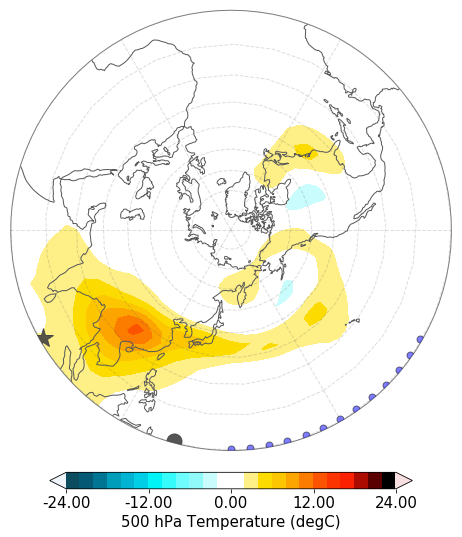

In [12]:
#------------ data to plot
data2plot  = air.isel(time=50).values
lats= air.lat.values

# make it cyclic over longitudes
cyclic_data, cyclic_lons = ccu.add_cyclic_point(data2plot, coord=air.lon.values)
cyclic_lons=cyclic_lons



#------------  projection
gloproj='NorthPolarStereo'
central_longitude=150
# set coastL to True if you want coaslines
coastL=True


#------------   type of plot (can be 'contourf', 'pcolormesh' or 'scatter', defaut is contourf)
typlo='contourf'

#------------  output settings
# plot format
pltty = ".png"

# plot resolution (dpi)
dpifig=300

# base name for output plot file
plto="ORTHOproj_T500_"+CONFIGNAME

# output directory for plots
diro="./"


#------------  colormap
cm_base=make_SLXcolormap(whichco='NCL')
# color of the values smaller than vmin
su='#EFF5FB'
# color of the values larger than vmax
so='#F8E0E0'
# colorbar label 
labelplt= "500 hPa Temperature ("+air.units+")"
# colorscale min max
vmin=-24
vmax=24
# number of labels on the colorbar
Nbar=5
# nb of intervals in the colorbar
Nincr=25


#------------ create fig
fig3 = plt.figure(figsize=([13,10]),facecolor='white')

#plot with 'NorthPolarStereo' projection
cs,ax,cb = testplotmap(fig3,cyclic_data,cyclic_lons,lats,plto,cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,glo=True,gloproj=gloproj,coastL=coastL,su=su,so=so,loncentr=central_longitude,typlo=typlo,Nbar=Nbar,labelplt=labelplt)


# add markers around
trdata  = ccrs.PlateCarree() 
ax.plot([90.], [0.9],markersize=20,linestyle='none', c="#424242", alpha=0.9, marker='*',markeredgecolor='#424242',zorder=10,transform=trdata)
ax.plot([135.], [0.5],markersize=15,linestyle='none', c="#424242", alpha=0.9, marker='o',markeredgecolor='#424242',zorder=10,transform=trdata)
ax.plot([150.,155,160,165,170,175,180,185,190,195,200,205,210.], [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5],markersize=7,linestyle='none', c="blue", alpha=0.5, marker='o',markeredgecolor='k',zorder=10,transform=trdata)

plt.show()
plt.close(fig3)  

# Save fig in png, resolution dpi
fig3.savefig(diro+"/"+plto+'.png', facecolor=fig3.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#
